# Documentation for the pySPM library

Loading the library

In [1]:
import pySPM

Let's set some variable and libraries to retrieve the data and plot them

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

filename = os.getenv("HOMEPATH") + r"\ownCloud\AFM\161222_OffResSS_CristA\CristA_0002.xml"

Let's load the data (forward topography by default) and plot it

Feedback: A_1st : P:1.6m/m : I:3.0ms
Size: 256×256 pixels = 20.0 um×20.0 um
Scan Speed: 6.0s/line


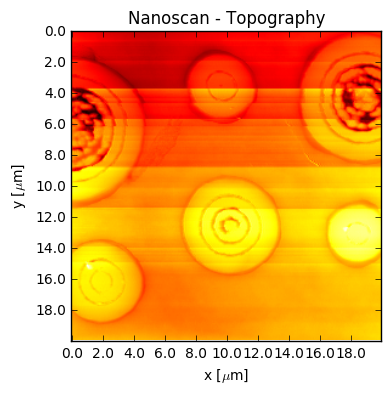

In [3]:
topo = pySPM.SPM_image(filename)
topo.show()
print(topo.getSummary())

## Data correction
We can correct the data while loading them. Either by lines or by slope.

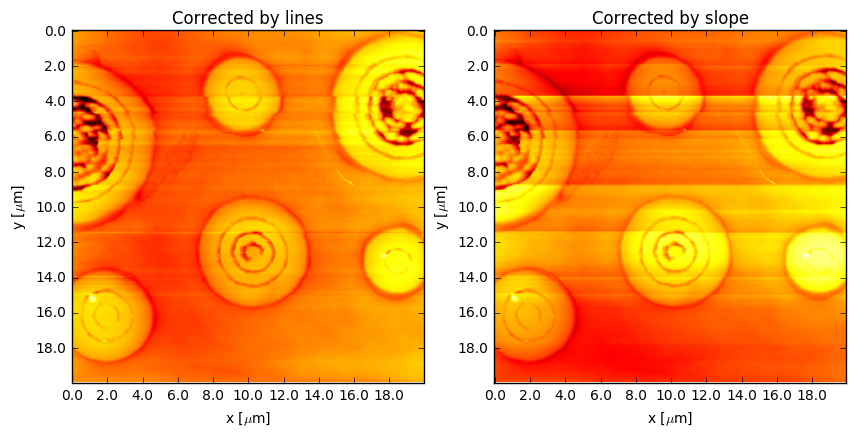

In [4]:
topo2 = pySPM.SPM_image(filename,corr="lines")
topo3 = pySPM.SPM_image(filename,corr="slope")

fig, ax = plt.subplots(1,2,figsize=(10,5))
topo2.show(ax=ax[0])
ax[0].set_title("Corrected by lines")
topo3.show(ax=ax[1])
ax[1].set_title("Corrected by slope");

### Data correction: Median of differences

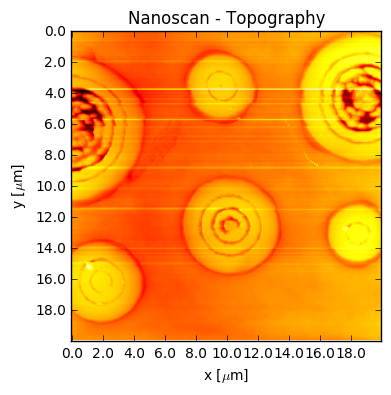

In [5]:
import copy
topo4 = copy.deepcopy(topo) # make deepcopy of object otherwise you will just change the original
topo4.correctMedianDiff()
topo4.show()

### Data correction: Adjust lines in order to have a given path flat
A better way to correct the data is by defining pathes that should be flat and each line will be offseted automatically in order to get the defines lines as flat as possible. First let's display the data with the pixel values in the axis instead of the real size. The pixels coordinated will be used to define the path.

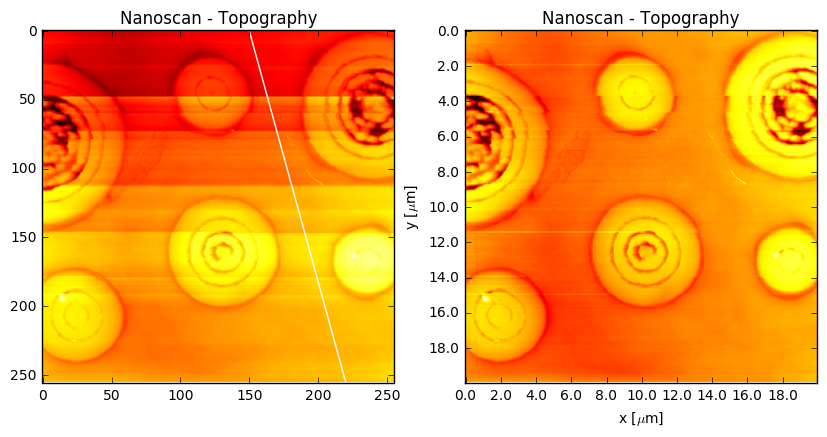

In [6]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot([150,220],[0,255],'w-');
topo.show(pixels=True,ax=ax[0])
topoC = topo.Offset([[150,0,220,255]],inline=False)
topoC.show(ax=ax[1])

in this particular case, the line (150,0) → (220,255) should be flat.
Here we used unline=False in order to create a new object with the corrected data and keep the data of topo untouched.

### Scars removal
We should now remove the scars from the image

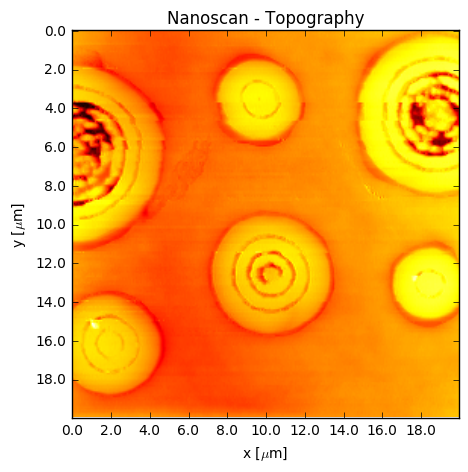

In [7]:
topoD = topoC.filterScarsRemoval(inline=False)

fig, ax = plt.subplots(1,1,figsize=(5,5))
topoD.show(ax=ax)

OK. This was the basic to read the data.

## Read specific channel
What about getting other information than just the topography?

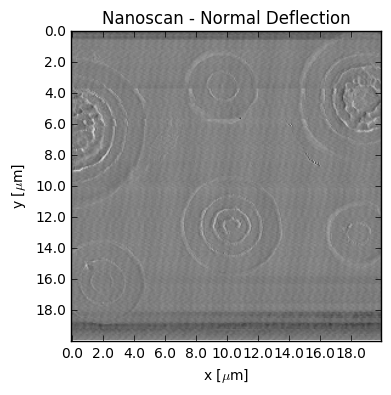

In [8]:
ND = pySPM.SPM_image(filename,channel="Normal Deflection")
ND.show()

Let's analyse the spectral response

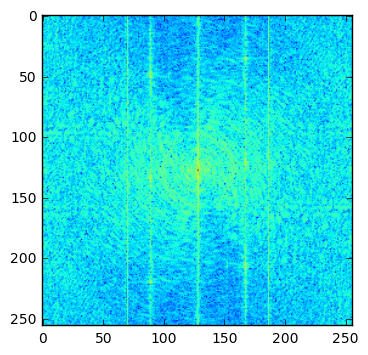

In [9]:
plt.imshow(np.log(np.abs(ND.getFFT())));

## Plotting the data

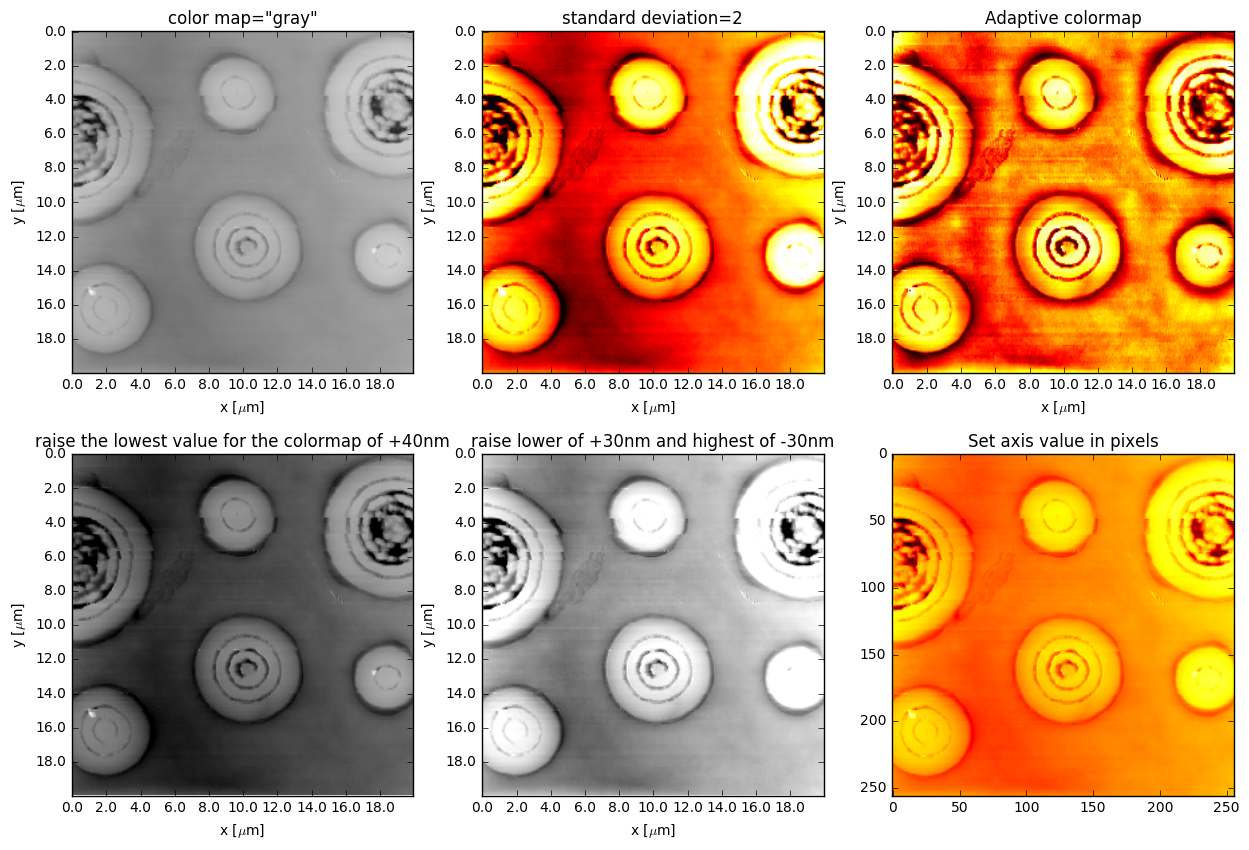

In [10]:
fig, (ax,ax2) = plt.subplots(2,3,figsize=(15,10))
topoD.show(ax=ax[0],cmap='gray',title="color map=\"gray\"")
topoD.show(ax=ax[1],sig=2,title="standard deviation=2")
topoD.show(ax=ax[2],adaptive=True,title="Adaptive colormap")
topoD.show(ax=ax2[0],dmin=4e-8,cmap='gray',title="raise the lowest value for the colormap of +40nm")
topoD.show(ax=ax2[1],dmin=3e-8,dmax=-3e-8,cmap='gray',title="raise lower of +30nm and highest of -30nm")
topoD.show(ax=ax2[2],pixels=True,title="Set axis value in pixels")

## Getting a profile

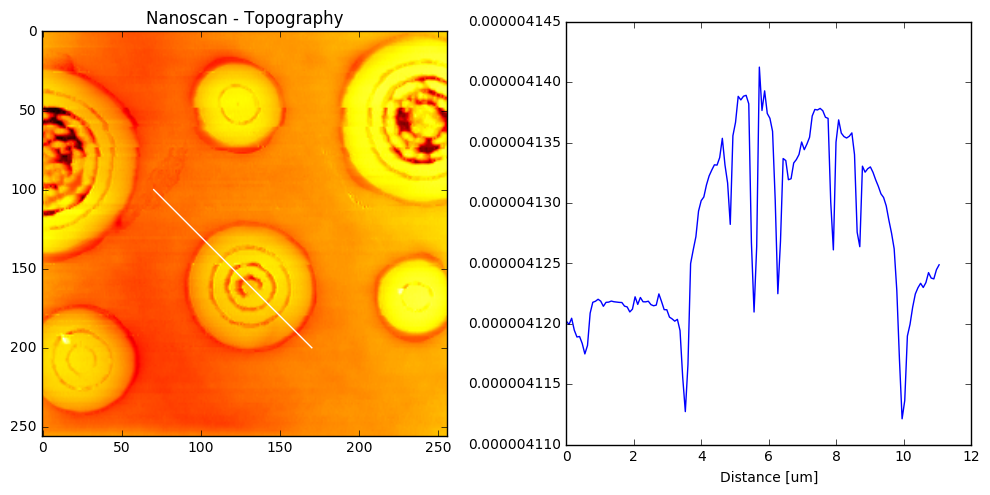

In [11]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

topoD.plotProfile(70,100,170,200,ax=ax[1],img=ax[0]);
topoD.show(ax=ax[0],pixels=True)

plt.tight_layout()

## Extra functions
### dist_v2
This function return you the distance to the closest corner. This might be usefull to be applied for FFT filters for example.

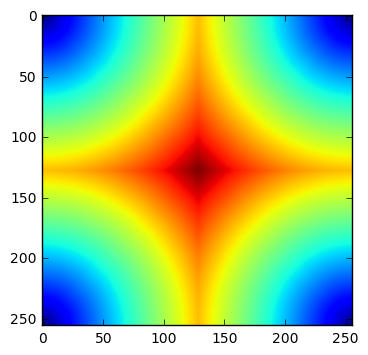

In [12]:
plt.imshow(topo.dist_v2());

### getBinThreshold
return a binary threshold of the data

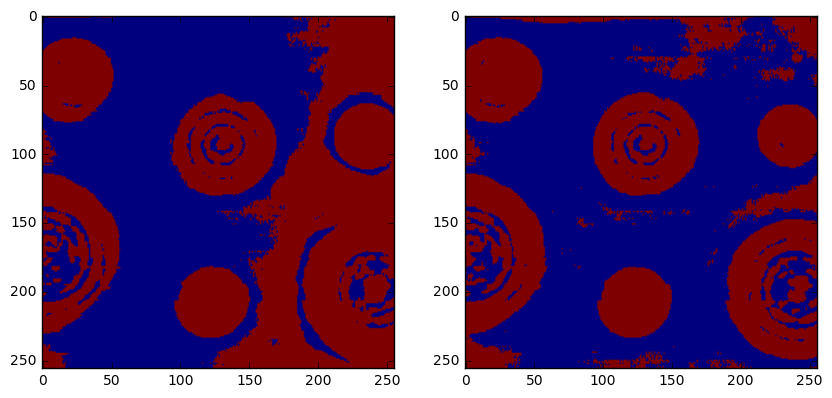

In [50]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

ax[0].imshow(topoD.getBinThreshold(.58));
ax[1].imshow(topoD.getBinThreshold(171,adaptive=True));

### fit2d
Fit a matrix by a 2d-polynomial (default 2nd order in x, 1st in y as it's the usual creep I observe with the piezo)

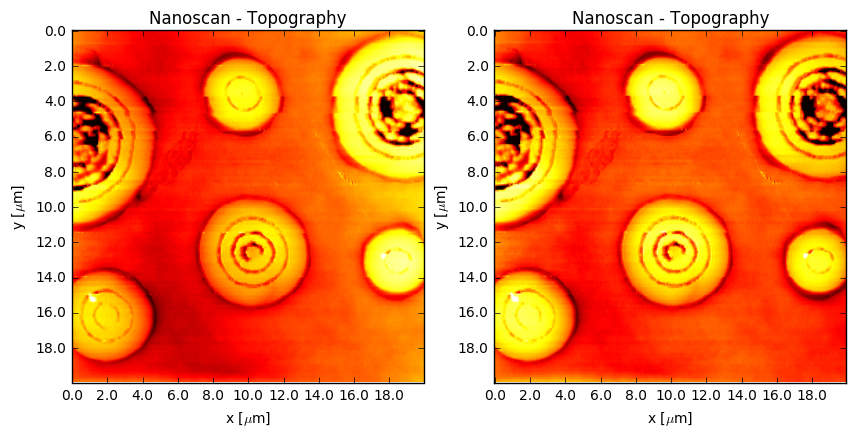

In [53]:
Flat = copy.deepcopy(topoD)
r,Z=pySPM.fit2d(Flat.pixels)
Flat.pixels -= Z

fig, ax = plt.subplots(1,2,figsize=(10,5))
topoD.show(ax=ax[0],sig=3)
Flat.show(ax=ax[1],sig=3)